In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
t = pd.read_csv("../configs/source_lens_colors.txt", delim_whitespace = True)

In [9]:
t

,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,WEIGHT,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT,CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT
0,19.860058,19.356785,19.101511,1.0,21.209831,20.116373,19.451138,0.289459,1.498554
1,21.727238,21.186876,20.936735,1.0,23.601688,21.635720,20.096643,0.694071,1.448451
2,21.905792,21.415257,21.301147,1.0,23.874054,22.165617,20.682098,0.689787,1.432028
3,20.558990,20.571768,18.709476,1.0,22.614456,20.969261,19.376028,0.588395,1.569212
4,21.773210,20.928560,20.523293,1.0,20.779610,19.739862,19.058002,0.321978,1.305413
...,...,...,...,...,...,...,...,...,...
37955,21.177942,20.686697,20.412899,1.0,21.140778,20.344130,19.971237,0.676398,1.376386
37956,21.932646,21.424908,21.158577,1.0,22.538180,21.605120,20.993498,0.498991,1.319586
37957,21.197853,20.851760,20.753910,1.0,22.903310,21.685564,20.526012,0.659345,1.890832
37958,20.602053,19.632769,19.124937,1.0,21.840660,20.335960,18.511550,0.281755,1.388814


(array([13098.,  8415.,  4856.,  2997.,  2424.,  1873.,  1572.,  1033.,
          912.,   780.]),
 array([1.2706939 , 1.34361829, 1.41654268, 1.48946707, 1.56239146,
        1.63531585, 1.70824024, 1.78116463, 1.85408902, 1.92701341,
        1.9999378 ]),
 <BarContainer object of 10 artists>)

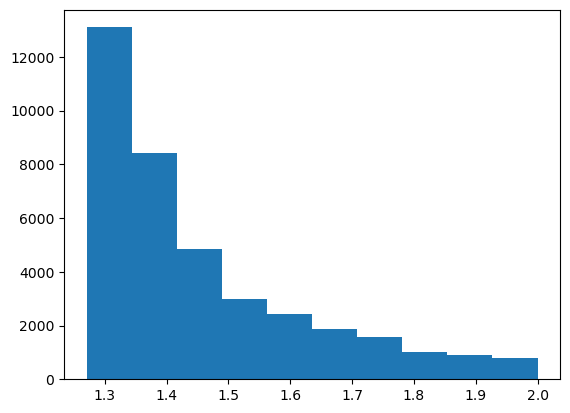

In [13]:
plt.hist(t['CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT'])

In [2]:
lsdr10 = pd.read_csv("../configs/ls_dr10_photoz_color.csv")

In [3]:
lsdr10

,ls_id,ra,dec,mag_g,mag_r,mag_z,z_spec,z_phot_mean_i,z_phot_median_i
0,10995228715520189,355.732008,-42.641127,24.450330,24.621650,23.206017,-99.0,1.140605,1.114858
1,10995437149361713,27.423972,-4.192483,26.019312,24.304600,24.201818,-99.0,1.145272,0.979175
2,10995600863529656,350.644523,23.361978,23.962683,23.644590,22.810200,-99.0,-99.000000,-99.000000
3,10995510907243812,2.692986,7.951239,24.717592,24.350988,24.081808,-99.0,-99.000000,-99.000000
4,10995607877456114,18.346375,24.747331,22.870699,22.380020,21.523410,-99.0,-99.000000,-99.000000
...,...,...,...,...,...,...,...,...,...
499995,10995362622882013,290.958729,-16.953820,inf,inf,21.458899,-99.0,-99.000000,-99.000000
499996,10995266453768109,332.507161,-34.844678,23.033237,inf,22.118164,-99.0,-99.000000,-99.000000
499997,10995368427787492,292.271334,-15.908519,inf,inf,22.908607,-99.0,-99.000000,-99.000000
499998,10995455933553652,188.356812,-1.239682,26.102304,25.455114,23.715536,-99.0,1.357562,1.207035


In [4]:
lsdr10['z_final'] = np.where(lsdr10['z_spec'] != -99, lsdr10['z_spec'], lsdr10['z_phot_mean_i'])

In [5]:
lsdrnew = lsdr10.loc[(lsdr10['z_final'] != -99)].dropna()

In [6]:
sample_colors = lsdrnew[['mag_g','mag_r', 'mag_z', 'z_final']]

In [7]:
sample_colors

,mag_g,mag_r,mag_z,z_final
0,24.450330,24.621650,23.206017,1.140605
1,26.019312,24.304600,24.201818,1.145272
5,25.186722,24.612091,23.741604,1.050439
6,24.674856,24.434700,23.177410,1.209943
8,23.710121,22.836721,21.424974,0.881166
...,...,...,...,...
499991,21.628975,20.524187,20.167797,0.637711
499993,24.040316,23.911428,23.383250,1.051120
499994,25.209300,23.957293,23.723505,0.765998
499998,26.102304,25.455114,23.715536,1.357562


(-2.0, 3.0)

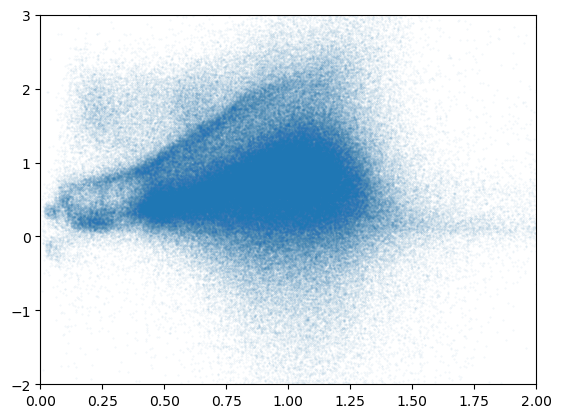

In [8]:
import matplotlib.pyplot as plt
plt.scatter(sample_colors['z_final'], sample_colors['mag_r'] - sample_colors['mag_z'], s = 0.1, alpha = 0.1)
plt.xlim(0, 2)
plt.ylim(-2, 3)

In [9]:
source_sample_colors = pd.read_csv("../configs/source_colors_with_zlens.txt", delim_whitespace = True)
source_sample_colors = source_sample_colors[source_sample_colors['CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT'] > 0]
source_sample_colors = pd.concat([source_sample_colors] * 5, ignore_index=True)

In [10]:
source_sample_colors

,CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT,WEIGHT
0,1.493197,21.875757,21.723236,20.283205,0.280203,1.0
1,1.442902,21.044741,22.096289,21.414358,0.691930,1.0
2,1.430981,21.641100,21.675371,21.397528,0.685003,1.0
3,1.561445,21.906784,21.832739,19.981070,0.589351,1.0
4,1.305264,20.681000,20.718277,19.972401,0.327502,1.0
...,...,...,...,...,...,...
37955,1.379176,21.611582,21.355047,20.137066,0.675972,1.0
37956,1.313136,21.916191,21.592533,21.433886,0.496264,1.0
37957,1.898150,20.859800,21.048883,20.247503,0.659321,1.0
37958,1.386898,21.544487,21.832838,20.642092,0.282309,1.0


Text(0, 0.5, 'g-r Color')

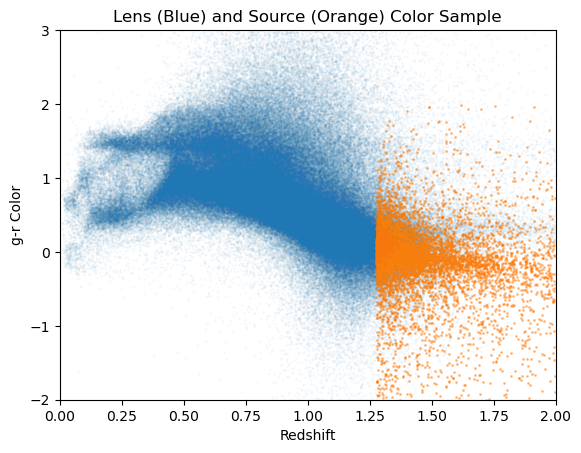

In [11]:
plt.scatter(sample_colors['z_final'], sample_colors['mag_g'] - sample_colors['mag_r'], s = 0.1, alpha = 0.1, label = "Lens")
sc = plt.scatter(source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT'], 
            source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'] - 
            source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r'],s = 1, alpha = 0.1, label = "Source")
plt.xlim(0, 2)
plt.ylim(-2, 3)
plt.title("Lens (Blue) and Source (Orange) Color Sample")
plt.xlabel("Redshift")
plt.ylabel("g-r Color")

In [12]:
bins = np.linspace(0, 2.0, 201) 
source_sample_colors['bin'] = np.digitize(source_sample_colors['CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT'], bins)
source_sample_colors['bin_src'] = np.digitize(source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT'], bins)
sample_colors['bin'] = np.digitize(sample_colors['z_final'], bins)
sample_colors_src = sample_colors.copy()
sample_colors = sample_colors[((sample_colors['mag_g'] > 17.5) & (sample_colors['mag_r'] > 17.5) & (sample_colors['mag_z'] > 17.5))
                            & ((sample_colors['mag_g'] < 21) | (sample_colors['mag_r'] < 21) | (sample_colors['mag_z'] < 21))]
sample_colors_src = sample_colors_src[(sample_colors_src['mag_g'] > 17.5) & (sample_colors_src['mag_r'] > 17.5) & (sample_colors_src['mag_z'] > 17.5) & (sample_colors_src['mag_g'] < 22)]

/deepskieslab/agarwal/.conda/envs/deeplens/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
source_sample_colors

,CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT,WEIGHT,bin,bin_src
0,1.493197,21.875757,21.723236,20.283205,0.280203,1.0,29,150
1,1.442902,21.044741,22.096289,21.414358,0.691930,1.0,70,145
2,1.430981,21.641100,21.675371,21.397528,0.685003,1.0,69,144
3,1.561445,21.906784,21.832739,19.981070,0.589351,1.0,59,157
4,1.305264,20.681000,20.718277,19.972401,0.327502,1.0,33,131
...,...,...,...,...,...,...,...,...
37955,1.379176,21.611582,21.355047,20.137066,0.675972,1.0,68,138
37956,1.313136,21.916191,21.592533,21.433886,0.496264,1.0,50,132
37957,1.898150,20.859800,21.048883,20.247503,0.659321,1.0,66,190
37958,1.386898,21.544487,21.832838,20.642092,0.282309,1.0,29,139


In [14]:
source_sample_colors['CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'] = -1
source_sample_colors['CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r'] = -1
source_sample_colors['CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z'] = -1
source_sample_colors['z_final'] = -1


for i in source_sample_colors.index:
    row = sample_colors.loc[np.random.choice(sample_colors.index[sample_colors['bin'] == source_sample_colors.loc[i]['bin']])]
    source_sample_colors['CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'].loc[i] = row['mag_g']
    source_sample_colors['CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r'].loc[i] = row['mag_r']
    source_sample_colors['CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z'].loc[i] = row['mag_z']
    source_sample_colors['z_final'].loc[i] = row['z_final']

/deepskieslab/agarwal/.conda/envs/deeplens/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'] = -1
source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r'] = -1
source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z'] = -1
source_sample_colors['z_src_final'] = -1


for i in source_sample_colors.index:
    row = sample_colors_src.loc[np.random.choice(sample_colors_src.index[sample_colors_src['bin'] == source_sample_colors.loc[i]['bin_src']])]
    source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'].loc[i] = row['mag_g']
    source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r'].loc[i] = row['mag_r']
    source_sample_colors['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z'].loc[i] = row['mag_z']
    source_sample_colors['z_src_final'].loc[i] = row['z_final']

In [16]:
source_sample_colors

,CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT,WEIGHT,bin,bin_src,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,z_final,z_src_final
0,1.493197,19.860058,19.356785,19.101511,0.280203,1.0,29,150,21.209831,20.116373,19.451138,0.289459,1.498554
1,1.442902,21.727238,21.186876,20.936735,0.691930,1.0,70,145,23.601688,21.635720,20.096643,0.694071,1.448451
2,1.430981,21.905792,21.415257,21.301147,0.685003,1.0,69,144,23.874054,22.165617,20.682098,0.689787,1.432028
3,1.561445,20.558990,20.571768,18.709476,0.589351,1.0,59,157,22.614456,20.969261,19.376028,0.588395,1.569212
4,1.305264,21.773210,20.928560,20.523293,0.327502,1.0,33,131,20.779610,19.739862,19.058002,0.321978,1.305413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37955,1.379176,21.177942,20.686697,20.412899,0.675972,1.0,68,138,21.140778,20.344130,19.971237,0.676398,1.376386
37956,1.313136,21.932646,21.424908,21.158577,0.496264,1.0,50,132,22.538180,21.605120,20.993498,0.498991,1.319586
37957,1.898150,21.197853,20.851760,20.753910,0.659321,1.0,66,190,22.903310,21.685564,20.526012,0.659345,1.890832
37958,1.386898,20.602053,19.632769,19.124937,0.282309,1.0,29,139,21.840660,20.335960,18.511550,0.281755,1.388814


In [17]:
source_sample_colors

,CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT,WEIGHT,bin,bin_src,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,z_final,z_src_final
0,1.493197,19.860058,19.356785,19.101511,0.280203,1.0,29,150,21.209831,20.116373,19.451138,0.289459,1.498554
1,1.442902,21.727238,21.186876,20.936735,0.691930,1.0,70,145,23.601688,21.635720,20.096643,0.694071,1.448451
2,1.430981,21.905792,21.415257,21.301147,0.685003,1.0,69,144,23.874054,22.165617,20.682098,0.689787,1.432028
3,1.561445,20.558990,20.571768,18.709476,0.589351,1.0,59,157,22.614456,20.969261,19.376028,0.588395,1.569212
4,1.305264,21.773210,20.928560,20.523293,0.327502,1.0,33,131,20.779610,19.739862,19.058002,0.321978,1.305413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37955,1.379176,21.177942,20.686697,20.412899,0.675972,1.0,68,138,21.140778,20.344130,19.971237,0.676398,1.376386
37956,1.313136,21.932646,21.424908,21.158577,0.496264,1.0,50,132,22.538180,21.605120,20.993498,0.498991,1.319586
37957,1.898150,21.197853,20.851760,20.753910,0.659321,1.0,66,190,22.903310,21.685564,20.526012,0.659345,1.890832
37958,1.386898,20.602053,19.632769,19.124937,0.282309,1.0,29,139,21.840660,20.335960,18.511550,0.281755,1.388814


In [18]:
final_txt = source_sample_colors.drop(columns = ['CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT', 'CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT', 'bin', 'bin_src'])
final_txt = final_txt.rename(columns={'z_final': 'CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT', 'z_src_final': 'CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT'})

In [19]:
final_txt

,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,WEIGHT,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT,CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT
0,19.860058,19.356785,19.101511,1.0,21.209831,20.116373,19.451138,0.289459,1.498554
1,21.727238,21.186876,20.936735,1.0,23.601688,21.635720,20.096643,0.694071,1.448451
2,21.905792,21.415257,21.301147,1.0,23.874054,22.165617,20.682098,0.689787,1.432028
3,20.558990,20.571768,18.709476,1.0,22.614456,20.969261,19.376028,0.588395,1.569212
4,21.773210,20.928560,20.523293,1.0,20.779610,19.739862,19.058002,0.321978,1.305413
...,...,...,...,...,...,...,...,...,...
37955,21.177942,20.686697,20.412899,1.0,21.140778,20.344130,19.971237,0.676398,1.376386
37956,21.932646,21.424908,21.158577,1.0,22.538180,21.605120,20.993498,0.498991,1.319586
37957,21.197853,20.851760,20.753910,1.0,22.903310,21.685564,20.526012,0.659345,1.890832
37958,20.602053,19.632769,19.124937,1.0,21.840660,20.335960,18.511550,0.281755,1.388814


In [20]:
final_txt.to_csv("../configs/source_lens_colors.txt", sep='\t', index = False)

In [21]:
print

<function print>